### **IMPORTING LIBRARIES**

In [ ]:
    #1.Pandas for dataframe
import pandas as pd

    #2. NumPy to peform Calculations
import numpy as np

    #3. Seaborn to Visualize data
import seaborn as sns

    #4. To split data
from sklearn.model_selection import train_test_split

    #5. For Logistic Regression
from sklearn.linear_model import LogisticRegression

    #6. For Plotting Graph
import matplotlib.pyplot as plt

    #7. For Natural Language Processing
import nltk
from nltk.corpus import stopwords

    #8. For Classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

    #9. For Analysing Text
import re
import string


### **DATA PREPROCESSING**

In [ ]:
  #Importing Data:
data_complaint= pd.read_excel('/content/Complaints.xlsx')

  #Creating Copy:
data=data_complaint.copy()

  #Printing top 5 entries
print(data.head())

  Date received           Product                                     Issue  \
0    03/21/2017  Credit reporting    Incorrect information on credit report   
1    04/19/2017   Debt collection           Disclosure verification of debt   
2    04/19/2017       Credit card                                     Other   
3    04/14/2017          Mortgage  Loan modification,collection,foreclosure   
4    04/19/2017       Credit card                      Credit determination   

  Consumer complaint narrative  \
0                          NaN   
1                          NaN   
2                          NaN   
3                          NaN   
4                          NaN   

                             Company public response  \
0  Company has responded to the consumer and the ...   
1                                                NaN   
2  Company has responded to the consumer and the ...   
3  Company believes it acted appropriately as aut...   
4  Company has responded to the consumer

In [ ]:
  #Taking only columns required for prediction
data = data[["Product", "Issue", "Consumer complaint narrative"]]

In [ ]:
  #Printing total NULL values of each column
print(data.isnull().sum())


Product                             0
Issue                               0
Consumer complaint narrative    10301
dtype: int64


In [ ]:
  #Dropping NaN(Not a Number) values
data = data.dropna(axis=0)
print(data.isnull().sum())

Product                         0
Issue                           0
Consumer complaint narrative    0
dtype: int64


In [ ]:
  #Checking objects data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 9 to 12464
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       2174 non-null   object
 1   Issue                         2174 non-null   object
 2   Consumer complaint narrative  2174 non-null   object
dtypes: object(3)
memory usage: 67.9+ KB
None


In [ ]:
  #Typecasting Data
data['Product'] = data['Product'].astype('string')
data['Issue'] = data['Issue'].astype('string')
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].astype('string')

  #Again checking objects data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 9 to 12464
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       2174 non-null   string
 1   Issue                         2174 non-null   string
 2   Consumer complaint narrative  2174 non-null   string
dtypes: string(3)
memory usage: 67.9 KB
None


In [ ]:
  #Count of Various Issues
print(data["Issue"].value_counts())

Incorrect information on credit report      247
Dealing with my lender or servicer          243
Cont'd attempts collect debt not owed       221
Loan servicing, payments, escrow account    159
Disclosure verification of debt             131
                                           ... 
Advertising, marketing or disclosures         1
Lost or stolen check                          1
Application processing delay                  1
Overlimit fee                                 1
Can't stop charges to bank account            1
Name: Issue, Length: 68, dtype: Int64


In [ ]:
  #Using NLP to pre-process text data
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
  #Defining function to clean text
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

  #Calling clean(text) function
data["Consumer complaint narrative"] = data["Consumer complaint narrative"].apply(clean)

In [ ]:
#Spliting data into train and test sets
x = np.array(data["Consumer complaint narrative"])
y = np.array(data["Product"])

#Training Model
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=42)

### **VISUALIZATION**

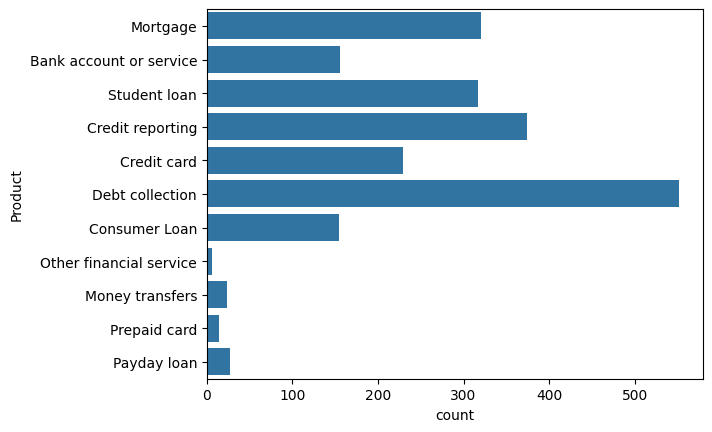

In [ ]:
#Frequency distribution of Complaint Type
SalStat=sns.countplot(data['Product'])

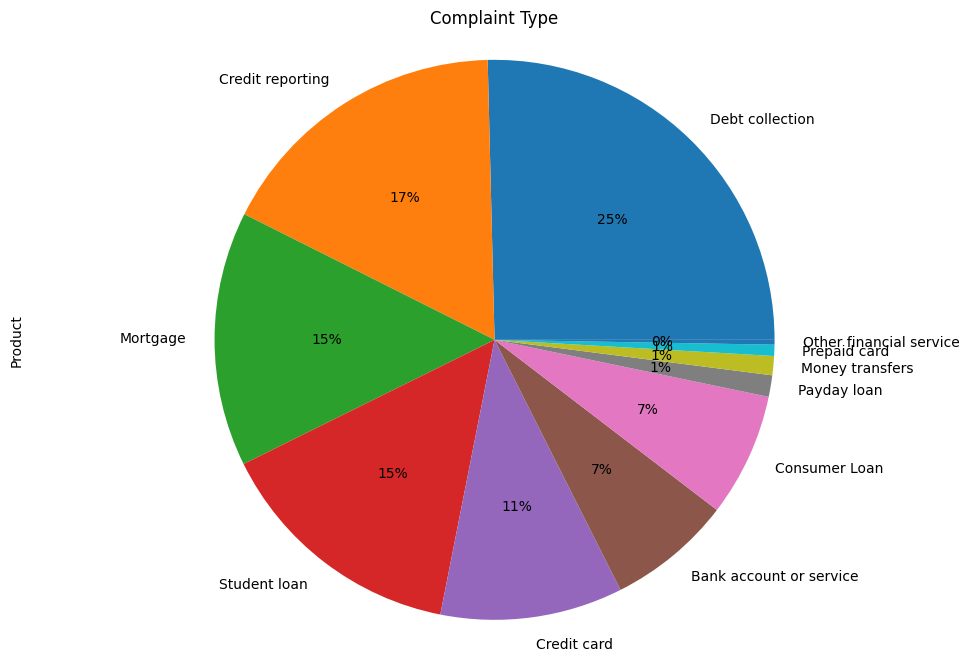

In [ ]:
#Pie Chart representation of Consumer Complaint Type
data.Product.value_counts().plot(kind='pie',
                                          autopct='%1.0f%%',
                                          figsize=(12, 8))
plt.title("Complaint Type")
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart
plt.show()

### **APPLYING CLASSIFICATION ALGORITHM**

In [ ]:
#Stochastic Gradient Descent (SGD) Classifier Algorithm
sgdmodel = SGDClassifier()
sgdmodel.fit(X_train,y_train)

SGDClassifier()

### **ACCURACY**

In [ ]:

print("Accuracy of SGD model:",sgdmodel.score(X_test,y_test)*100,"%")


Accuracy of SGD model: 70.61281337047353 %


### **PREDICTION OF COMPLAINT**

In [ ]:
#Taking User Input
user =input("Enter Complaint Narrative: ")
data = cv.transform([user]).toarray()
output = sgdmodel.predict(data)

#Printing the type of complaint
print("Type of Complaint:",output[0])

Enter Complaint Narrative: I lost my wallet
Type of Complaint: Debt collection
